# An Analysis of Porejimo Supply Chain Disruptions
## Jeff Wagg (February 22, 2024)

The Republic of Porejimo faces significant challenges with the diversion of humanitarian supplies, which hinders the provision of timely and quality aid to vulnerable populations. Diversions can relate to different sections of the supply chain for bringing humanitarian supplies to intended aid recipients. One of the key reasons known for the diversions is the loss of stock due to a growing black market for the packaging materials the aid materials are transported in.

Recently, there has been a notable increase in the prices for specialized packaging materials. This has raised concerns that inventories are being diverted from loading warehouses before getting to the distribution points to be sold in the black market where they attract high prices.

The attached five datasets contain information that can inform the analysis:

- File: mkt_prices_packaging.csv: Market prices (in USD) for two different types of packaging materials used to transport the aid supplies (px_matA, px_matB).

- File: mkt_prices_supplies.csv: Market prices (in USD) for three different types of humanitarian supplies being transported (px_hsA, px_hsB, px_hsC).

- File: quantity_loading.csv: Quantities delivered (in kg) to the loading warehouse for the three different types of humanitarian supplies (q_loadA, q_loadB, q_loadC).

- File: quantity_distribution.csv: Quantities delivered (in kg) to the distribution point for the three different types of humanitarian supplies (q_distA, q_distB, q_distC).

- File: weather.csv: Average daily temperature (in Celsius) and total daily rainfall (in mm) at the distribution point (temp, rainfall).

- Each row in the datasets corresponds to specific dates over a two-month period. Measurements for some dates may be missing.

The Country Office of the Republic of Porejimo would like to use this data to make a prudent decision about a potential intervention to address the issue. They would like your data science expertise to help address the following questions:

- Are the market prices for the packaging materials explaining the diversion of humanitarian supplies?

- What other factors might be explaining the diversion of humanitarian supplies?

- What else should the Country Office think about to understand the situation (for example, any reason to suspect the data quality)?

## Import required packages and read the datasets 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# For each file, read data into dataframe and convert the 'date' column to datetime format
df_mkprices_pack = pd.read_csv("assessment-data/mkt_prices_packaging.csv",sep = ';')
df_mkprices_pack['date'] = pd.to_datetime(df_mkprices_pack['date'])
df_mkprices_pack.info

<bound method DataFrame.info of          date  px_matA  px_matB
0  2023-12-01     4.32     5.71
1  2023-12-02     4.32     5.71
2  2023-12-03     4.32     5.71
3  2023-12-04     4.32     5.71
4  2023-12-05     4.32     5.71
..        ...      ...      ...
57 2024-01-27     4.81     6.50
58 2024-01-28     4.52     5.84
59 2024-01-29     4.59     6.02
60 2024-01-30     5.19     5.78
61 2024-01-31     4.35     6.62

[62 rows x 3 columns]>

In [3]:
df_mkprices_supp = pd.read_csv("assessment-data/mkt_prices_supplies.csv",sep=';')
df_mkprices_supp['date'] = pd.to_datetime(df_mkprices_supp['date'])
df_mkprices_supp.info

<bound method DataFrame.info of          date  px_hsA  px_hsB  px_hsC
0  2023-12-01    1.00    0.24    0.82
1  2023-12-02    1.00    0.24    0.82
2  2023-12-03    1.00    0.24    0.82
3  2023-12-04    1.00    0.24    0.82
4  2023-12-05    1.00    0.24    0.82
..        ...     ...     ...     ...
57 2024-01-27    1.85    0.45    1.01
58 2024-01-28    1.85    0.45    1.01
59 2024-01-29    1.85    0.45    1.01
60 2024-01-30    1.85    0.45    1.01
61 2024-01-31    1.85    0.45    1.01

[62 rows x 4 columns]>

In [4]:
df_qtyload = pd.read_csv("assessment-data/quantity_loading.csv",sep=';')
df_qtyload['date'] = pd.to_datetime(df_qtyload['date'])
df_qtyload.info

<bound method DataFrame.info of          date  q_loadA  q_loadB  q_loadC
0  2023-12-01      295     1108     1083
1  2023-12-02      270     1074     1144
2  2023-12-03        0        0        0
3  2023-12-04      264     1150     1142
4  2023-12-05      256     1112     1129
..        ...      ...      ...      ...
57 2024-01-27      227      952     1118
58 2024-01-28      244      970     1082
59 2024-01-29      228      988     1084
60 2024-01-30      239      960     1115
61 2024-01-31      247      988     1090

[62 rows x 4 columns]>

In [5]:
# Noted that there is one incomplete data entry which needs to be fixed in 'weather.csv' dataset
df_qtydist = pd.read_csv("assessment-data/quantity_distribution.csv",sep=';')
df_qtydist['date'] = pd.to_datetime(df_qtydist['date'])
df_qtydist.info

<bound method DataFrame.info of          date  q_distA  q_distB  q_distC
0  2023-12-01      246     1048     1038
1  2023-12-02      212     1052     1054
2  2023-12-03        0        0        0
3  2023-12-04      236     1016     1096
4  2023-12-05      245     1060     1042
..        ...      ...      ...      ...
57 2024-01-27      170      964      990
58 2024-01-28      199      950      998
59 2024-01-29      176      982      992
60 2024-01-30      158      910      908
61 2024-01-31      183      958      988

[62 rows x 4 columns]>

In [6]:
# Noted that there is one incomplete data entry which needs to be fixed in 'weather.csv' dataset
df_weath = pd.read_csv("assessment-data/weather.csv",sep=';')
df_weath = df_weath.replace(to_replace="12/10/202",value="12/10/2023")
df_weath['date'] = pd.to_datetime(df_weath['date'])
df_weath.info

<bound method DataFrame.info of          date  temp  rainfall
0  2023-12-01  25.2      7.44
1  2023-12-02  26.2      0.50
2  2023-12-03  26.9      7.99
3  2023-12-04  26.8      8.19
4  2023-12-05  26.3      0.52
..        ...   ...       ...
57 2024-01-27  26.2      0.00
58 2024-01-28  25.5      7.96
59 2024-01-29  25.8      7.51
60 2024-01-30  25.7      8.01
61 2024-01-31  25.5      8.16

[62 rows x 3 columns]>

## Join the datasets together by date and perform some further cleaning 

In [7]:
df_join = pd.merge(
    df_mkprices_pack,
    df_mkprices_supp,
    on="date",
    sort=True
)
df_join = pd.merge(
    df_join,
    df_qtyload,
    on="date",
    sort=True
)
df_join = pd.merge(
    df_join,
    df_qtydist,
    on="date",
    sort=True
)
df_join = pd.merge(
    df_join,
    df_weath,
    on="date",
    sort=True
)
df_join

,date,px_matA,px_matB,px_hsA,px_hsB,px_hsC,q_loadA,q_loadB,q_loadC,q_distA,q_distB,q_distC,temp,rainfall
0,2023-12-01,4.32,5.71,1.00,0.24,0.82,295,1108,1083,246,1048,1038,25.2,7.44
1,2023-12-02,4.32,5.71,1.00,0.24,0.82,270,1074,1144,212,1052,1054,26.2,0.50
2,2023-12-03,4.32,5.71,1.00,0.24,0.82,0,0,0,0,0,0,26.9,7.99
3,2023-12-04,4.32,5.71,1.00,0.24,0.82,264,1150,1142,236,1016,1096,26.8,8.19
4,2023-12-05,4.32,5.71,1.00,0.24,0.82,256,1112,1129,245,1060,1042,26.3,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2024-01-27,4.81,6.50,1.85,0.45,1.01,227,952,1118,170,964,990,26.2,0.00
58,2024-01-28,4.52,5.84,1.85,0.45,1.01,244,970,1082,199,950,998,25.5,7.96
59,2024-01-29,4.59,6.02,1.85,0.45,1.01,228,988,1084,176,982,992,25.8,7.51
60,2024-01-30,5.19,5.78,1.85,0.45,1.01,239,960,1115,158,910,908,25.7,8.01


In [8]:
# We note some missing values in the table (=0) which we replace with the mean of the column
df_join_int = df_join.mask(df_join==0).fillna(df_join.mean())

<ipython-input-8-4b494c6c861a>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_join_int = df_join.mask(df_join==0).fillna(df_join.mean())


In [9]:
df_join_int

,date,px_matA,px_matB,px_hsA,px_hsB,px_hsC,q_loadA,q_loadB,q_loadC,q_distA,q_distB,q_distC,temp,rainfall
0,2023-12-01,4.32,5.71,1.00,0.24,0.82,295.000000,1108.000000,1083.000000,246.000000,1048.000000,1038.000000,25.2,7.440000
1,2023-12-02,4.32,5.71,1.00,0.24,0.82,270.000000,1074.000000,1144.000000,212.000000,1052.000000,1054.000000,26.2,0.500000
2,2023-12-03,4.32,5.71,1.00,0.24,0.82,212.741935,895.709677,943.467742,161.935484,798.806452,816.564516,26.9,7.990000
3,2023-12-04,4.32,5.71,1.00,0.24,0.82,264.000000,1150.000000,1142.000000,236.000000,1016.000000,1096.000000,26.8,8.190000
4,2023-12-05,4.32,5.71,1.00,0.24,0.82,256.000000,1112.000000,1129.000000,245.000000,1060.000000,1042.000000,26.3,0.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2024-01-27,4.81,6.50,1.85,0.45,1.01,227.000000,952.000000,1118.000000,170.000000,964.000000,990.000000,26.2,30.236613
58,2024-01-28,4.52,5.84,1.85,0.45,1.01,244.000000,970.000000,1082.000000,199.000000,950.000000,998.000000,25.5,7.960000
59,2024-01-29,4.59,6.02,1.85,0.45,1.01,228.000000,988.000000,1084.000000,176.000000,982.000000,992.000000,25.8,7.510000
60,2024-01-30,5.19,5.78,1.85,0.45,1.01,239.000000,960.000000,1115.000000,158.000000,910.000000,908.000000,25.7,8.010000


## Feature engineering

We have been given the information that some supplies are possibly being diverted from the loading warehouse before reaching the distribution sites. It is therefore useful to create three new features which are the 'losses' (in kg) that have occurred for each of the three supplies on a given date. We assume that the supplies are transported between the loading warehouse and distribution point on the same day. 

In [80]:
df_join_int['q_lossA'] = df_join_int['q_loadA'] - df_join_int['q_distA']
df_join_int['q_lossB'] = df_join_int['q_loadB'] - df_join_int['q_distB']
df_join_int['q_lossC'] = df_join_int['q_loadC'] - df_join_int['q_distC']

## Modelling 

At this stage, we want to develop a machine learning model with the existing data that can predict the cost of the packaging material. The goal is to see whether there are features in the data which are correlated with the cost of packaging. We assume that packaging materials A and B might be used to package supplies A, B, or C.  

We will start with a simple multi-target linear regression model. The two target variables are the prices of the packaging material (px_matA and px_matB), and for model features we will use the prices of the three supplies, the  losses each supply between loading and distribution points, and the weather data. Training and testing datasets will be created with an 80:20 split. 

In [146]:
features = ['px_hsA','px_hsB','px_hsC','temp','rainfall','q_lossA','q_lossB','q_lossC']
X = df_join_int[features]
targets = ['px_matA','px_matB']
y = df_join_int[targets]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99,test_size=0.2, shuffle=True)

In [148]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# try the linear regression model first 
model_lr = LinearRegression().fit(X_train,y_train)
y_pred = model_lr.predict(X_test)
print("Linear regression model MSE:",mean_squared_error(y_test,y_pred))

Linear regression model MSE: 0.0839076004605618


The model does a very good job of predicting the prices of packaging materials A and B. 

Target: px_matA
Feature: px_hsA, Score: 0.03419
Feature: px_hsB, Score: -0.12833
Feature: px_hsC, Score: 0.24979
Feature: temp, Score: 0.02728
Feature: rainfall, Score: 0.00999
Feature: q_lossA, Score: 0.10002
Feature: q_lossB, Score: -0.00787
Feature: q_lossC, Score: 0.09690


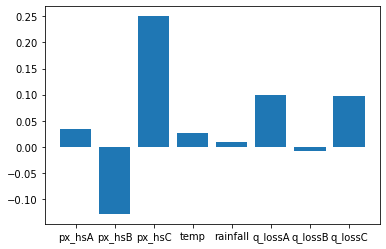

Target: px_matB
Feature: px_hsA, Score: 0.08125
Feature: px_hsB, Score: -0.16943
Feature: px_hsC, Score: 0.30170
Feature: temp, Score: -0.03952
Feature: rainfall, Score: -0.02097
Feature: q_lossA, Score: 0.11271
Feature: q_lossB, Score: 0.09755
Feature: q_lossC, Score: -0.01758


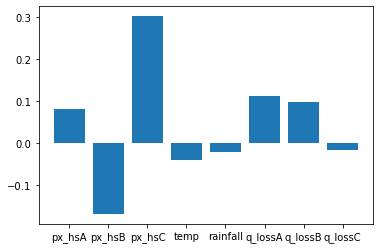

In [149]:
# Now we want to determine which of the features is most important when predicting the packaging price. 
importance = model_lr.coef_

print("Target: "+targets[0])
for i,v in enumerate(importance[0]):
  print('Feature: '+features[i]+', Score: %.5f' % (v))
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.xticks([x for x in range(len(importance[0]))], features)
plt.show()


print("Target: "+targets[1])
for i,v in enumerate(importance[1]):
  print('Feature: '+features[i]+', Score: %.5f' % (v))
plt.bar([x for x in range(len(importance[1]))], importance[1])
plt.xticks([x for x in range(len(importance[1]))], features)
plt.show()

We see that the prices of packaging materials A and B appear to be most strongly correlated with the price of supply item C. We can verify this by creating a correlation matrix. 

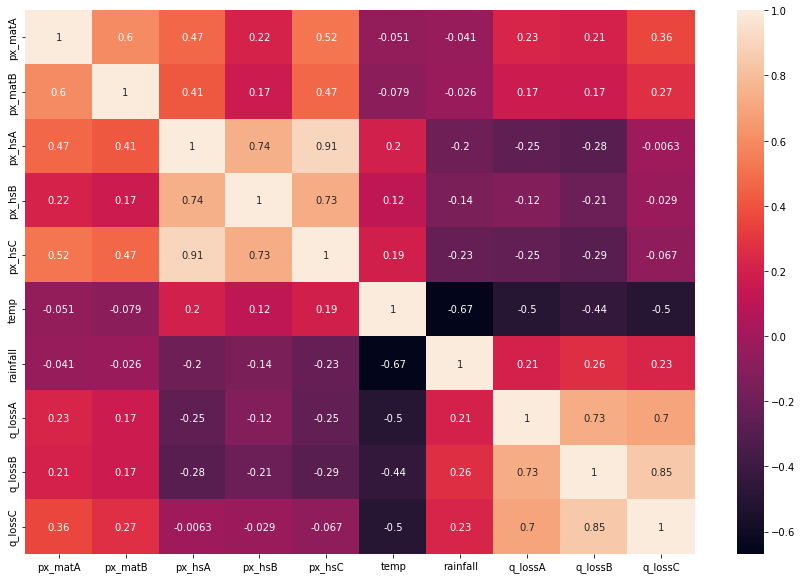

In [150]:
# Verify by calculating and plotting a correlation matrix
cmatrix = df_join_int[targets+features].corr()
plt.figure(figsize = (15,10))
sn.heatmap(cmatrix,annot=True)
plt.show()

This matrix is very instructive as it not only confirms that the prices of the packaging materials are correlated with the price of supply item C, and not with the mass of supplies lost. It also shows that the mass of materials lost is inversely correlated with the temperature. This would suggest that on hot days, the amount of material lost is lower. 